#Arbitrary Value Imputation

This technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [ ]:
import pandas as pd

In [ ]:
df =pd.read_csv('/content/drive/My Drive/kaggle/titanic.csv' , usecols = ['Age' , 'Survived' ,'Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
def impute_nan(df,variable):
  df[variable +'_zero'] = df[variable].fillna(0)
  df[variable +'_hundred'] = df[variable].fillna(100)

In [ ]:
impute_nan(df ,'Age')

In [ ]:
df.head(20)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


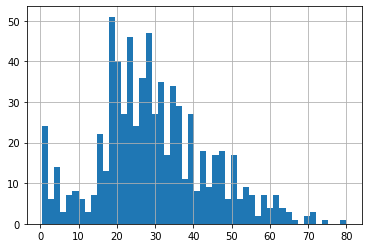

In [ ]:
df['Age'].hist(bins = 50)

#Advantages
Easy to implement

Captures the importance of missingess if there is one
#Disadvantages
Distorts the original distribution of the variable

If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution

Hard to decide which value to use

#Frequent Category Imputation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/loan.csv' , usecols = ['BsmtQual' , 'FireplaceQu', 'GarageType'])
df.head()

,BsmtQual,FireplaceQu,GarageType
0,Gd,NaN,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd


In [ ]:
df.shape


(1460, 3)

In [ ]:
df.isnull().sum()


BsmtQual        37
FireplaceQu    690
GarageType      81
dtype: int64

In [ ]:
df.isnull().mean().sort_values(ascending=True)


BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

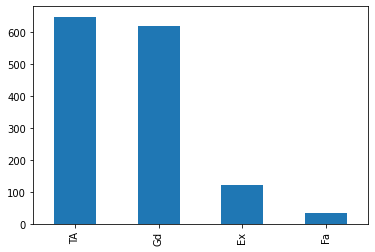

In [ ]:
#Compute the frequency with every feature
df['BsmtQual'].value_counts().plot.bar()


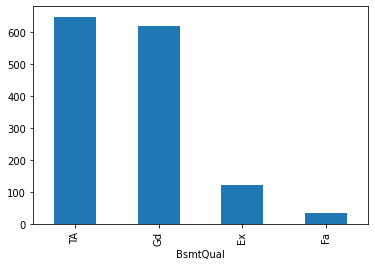

In [ ]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()


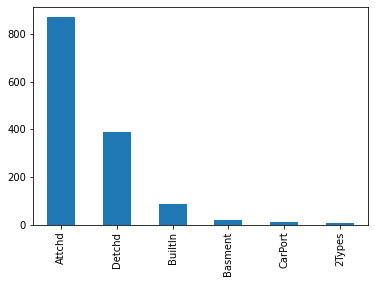

In [ ]:
df['GarageType'].value_counts().plot.bar()


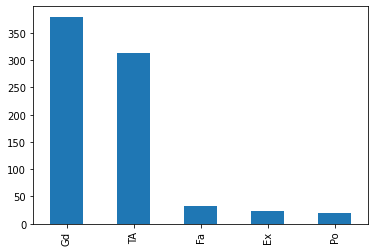

In [ ]:
df['FireplaceQu'].value_counts().plot.bar()


In [ ]:
df['GarageType'].value_counts().index[0]


'Attchd'

In [ ]:
df['GarageType'].mode()[0]


'Attchd'

In [ ]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [ ]:
df.isnull().mean()


BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
dtype: float64

#Adding a variable to capture NAN

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/loan.csv' , usecols = ['BsmtQual' , 'FireplaceQu', 'GarageType'])
df.head()

,BsmtQual,FireplaceQu,GarageType
0,Gd,NaN,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd


In [ ]:
import numpy as np
df['BsmtQual_Var'] = np.where(df['BsmtQual'].isnull(),1,0)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQual_Var
0,Gd,NaN,Attchd,0
1,Gd,TA,Attchd,0
2,Gd,TA,Attchd,0
3,TA,Gd,Detchd,0
4,Gd,TA,Attchd,0


In [ ]:
frequent = df['BsmtQual'].mode()[0]

In [ ]:
frequent

'TA'

In [ ]:
df['BsmtQual'].fillna(frequent , inplace = True)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQual_Var
0,Gd,NaN,Attchd,0
1,Gd,TA,Attchd,0
2,Gd,TA,Attchd,0
3,TA,Gd,Detchd,0
4,Gd,TA,Attchd,0


In [ ]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,0,1
1,Gd,TA,Attchd,0,0
2,Gd,TA,Attchd,0,0
3,TA,Gd,Detchd,0,0
4,Gd,TA,Attchd,0,0


#One Hot Encoding

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/titanic.csv' , usecols = ['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [ ]:
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
pd.get_dummies(df , drop_first = True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/titanic.csv' , usecols = ['Embarked'])

In [ ]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
pd.get_dummies(df).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
pd.get_dummies(df , drop_first = True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
